0       8724
1      10273
2      10666
3      11036
4      10161
       ...  
254    21058
255    20892
256    22519
257    22973
258    29076
Length: 259, dtype: int64


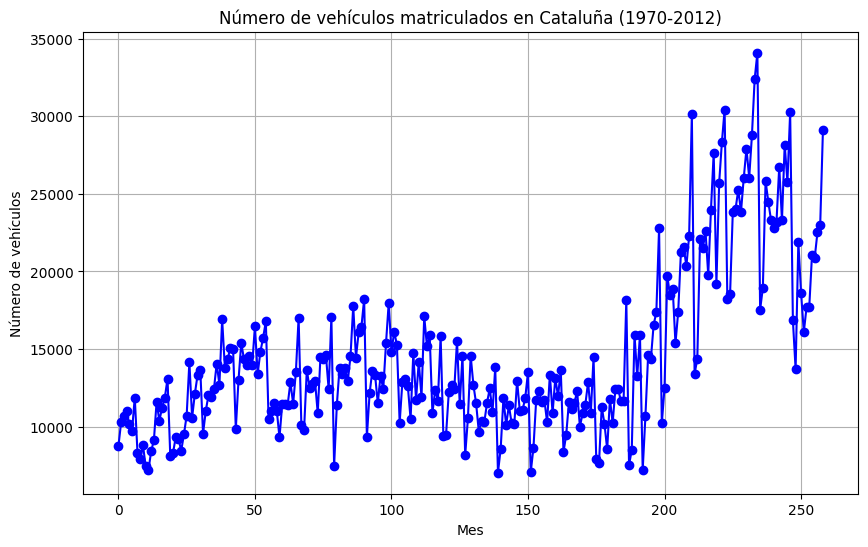

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from Models.sarimax.sarimax import Sarimax
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Nombre de vehicles matriculats a Catalunya. Dades mensuals des de 1970 fins a 2012


# Datos de vehículos matriculados en Cataluña 
data = [8724, 10273, 10666, 11036, 10161, 9743, 11876, 8309, 7892, 8801, 7450, 7186, 8418, 9110, 11607, 10372, 11223, 11863, 13089, 8116, 8297, 9321, 9234, 8445, 9494, 10709, 14159, 10582, 12111, 13324, 13634, 9544, 11016, 12032, 11901, 12431, 14067, 12701, 16905, 13778, 14341, 15054, 14997, 9856, 13027, 15399, 14335, 13974, 14559, 13988, 16459, 13398, 14813, 15727, 16777, 10524, 10977, 11535, 11032, 9306, 11450, 11447, 11422, 12865, 11469, 13529, 17016, 10130, 9807, 13655, 12495, 12747, 12937, 10867, 14516, 14374, 14608, 12413, 17051, 7456, 11405, 13806, 13402, 13807, 12914, 14529, 17770, 14449, 16091, 16425, 18217, 9335, 12160, 13606, 13313, 11512, 13288, 12420, 15359, 17991, 14788, 16128, 15253, 10246, 12873, 13063, 12590, 10493, 14729, 11737, 14187, 11908, 17098, 15181, 15882, 10862, 12369, 11682, 15839, 9425, 9492, 12226, 12714, 12404, 15530, 11438, 14554, 8170, 10538, 14576, 12695, 11492, 9657, 10334, 10281, 11537, 12471, 10939, 13814, 7032, 8589, 11821, 10094, 11365, 10234, 10182, 12972, 11010, 11048, 11874, 13513, 7062, 8640, 11733, 12317, 11591, 11722, 10269, 13351, 10871, 13148, 11949, 13661, 8356, 9492, 11609, 11142, 11550, 12265, 9991, 10861, 11426, 12870, 10891, 14464, 7899, 7643, 11279, 10177, 8536, 11786, 10228, 12420, 12446, 11648, 11659, 18167, 7525, 8506, 15915, 13248, 15909, 7210, 10681, 14634, 14356, 16551, 17376, 22797, 10204, 12513, 19732, 18458, 18867, 15363, 17383, 21249, 21555, 20342, 22260, 30121, 13408, 14345, 22060, 21480, 22603, 19768, 23975, 27634, 19217, 25698, 28324, 30418, 18205, 18544, 23849, 24018, 25258, 23843, 26004, 27906, 26034, 28759, 32381, 34085, 17530, 18939, 25824, 24485, 23296, 22763, 23213, 26745, 23296, 28160, 25769, 30262, 16853, 13691, 21898, 18618, 16088, 17684, 17735, 21058, 20892, 22519, 22973, 29076]
ts= pd.Series(datos)
print(ts)

# Crear la serie temporal
ts= pd.Series(data)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(ts, color='blue', marker='o', linestyle='-')
plt.title('Número de vehículos matriculados en Cataluña (1970-2012)')
plt.xlabel('Mes')
plt.ylabel('Número de vehículos')
plt.grid(True)
plt.show()

1      1549.0
2       393.0
3       370.0
4      -875.0
5      -418.0
        ...  
254    3323.0
255    -166.0
256    1627.0
257     454.0
258    6103.0
Length: 258, dtype: float64


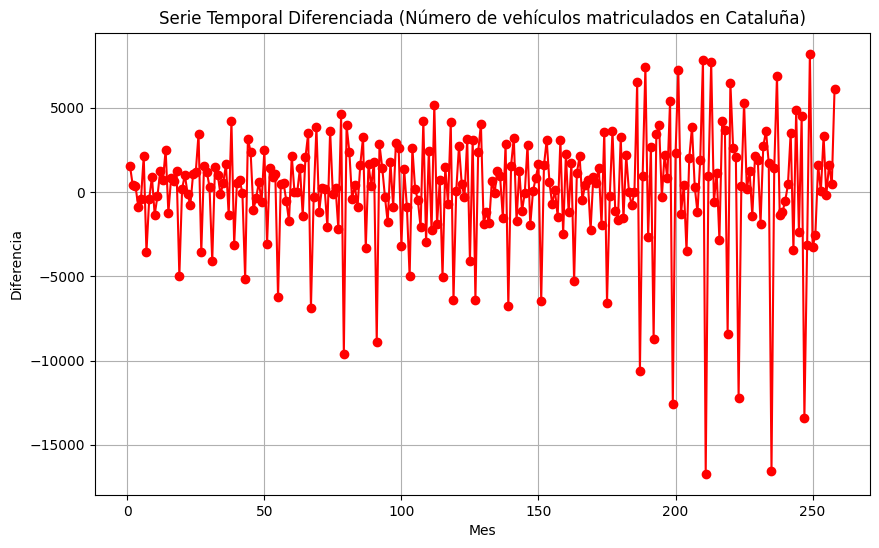

In [31]:
# Diferenciar la serie temporal
ts_diff= ts.diff().dropna()

# Imprimir la serie diferenciada
print(ts_diff)

plt.figure(figsize=(10, 6))
plt.plot(ts_diff, color='red', marker='o', linestyle='-')
plt.title('Serie Temporal Diferenciada (Número de vehículos matriculados en Cataluña)')
plt.xlabel('Mes')
plt.ylabel('Diferencia')
plt.grid(True)
plt.show()

In [32]:
# Realizar el Test de Dickey-Fuller
resultado_test = adfuller(ts_diff)

# Imprimir el resultado del Test de Dickey-Fuller
print('Estadística de Dickey-Fuller:', resultado_test[0])
print('Valor p:', resultado_test[1])
print('Valores críticos:', resultado_test[4])

Estadística de Dickey-Fuller: -2.4882391230870415
Valor p: 0.11836215989056043
Valores críticos: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}


2     -1156.0
3       -23.0
4     -1245.0
5       457.0
6      2551.0
        ...  
254    3272.0
255   -3489.0
256    1793.0
257   -1173.0
258    5649.0
Length: 257, dtype: float64


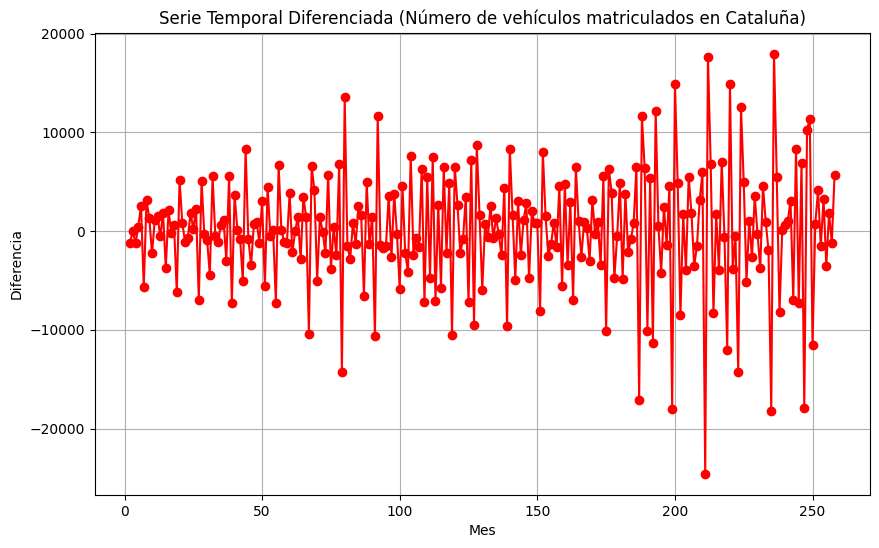

In [33]:
# Diferenciar la serie temporal nuevamente
ts_diff_diff = ts_diff.diff().dropna()

# Imprimir la serie diferenciada nuevamente
print(ts_diff_diff)

plt.figure(figsize=(10, 6))
plt.plot(ts_diff_diff, color='red', marker='o', linestyle='-')
plt.title('Serie Temporal Diferenciada (Número de vehículos matriculados en Cataluña)')
plt.xlabel('Mes')
plt.ylabel('Diferencia')
plt.grid(True)
plt.show()


In [34]:
# Realizar el Test de Dickey-Fuller
resultado_test = adfuller(ts_diff_diff)

# Imprimir el resultado del Test de Dickey-Fuller
print('Estadística de Dickey-Fuller:', resultado_test[0])
print('Valor p:', resultado_test[1])
print('Valores críticos:', resultado_test[4])

Estadística de Dickey-Fuller: -9.596599649607507
Valor p: 1.970743050812523e-16
Valores críticos: {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}
